In [1]:
import os
from tools import FileTools as ft
import RetinotopicMapping as rm
import skimage.external.tifffile as tf
import matplotlib.pyplot as plt
from scipy import io as sio
import numpy as np
%matplotlib inline

In [2]:
example_folder = os.path.join('.', 'examples', 'signmap_analysis')
data_folder = r'G:\My Drive\Data\ISI\200514Ms1\001'

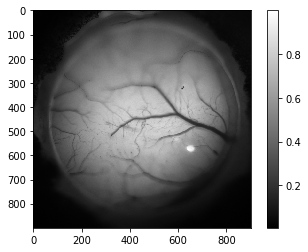

In [3]:
vasculature_map = tf.imread(os.path.join(example_folder,'example_vasculature_map.tif'))
_ = plt.imshow(vasculature_map, cmap='gray', interpolation='nearest')
_ = plt.colorbar()
plt.show()

In [96]:
altitude_data = sio.loadmat(os.path.join(data_folder,'retinotopy_elevation map_fft.mat'))
azimuth_data = sio.loadmat(os.path.join(data_folder,'retinotopy_azimuth map_fft.mat'))
total_power_map = tf.imread(os.path.join(data_folder,'totalPower_fft.tiff'))

## use total power for now

In [97]:
total_power_map = np.double(total_power_map)/255
altitude_power_map = total_power_map
azimuth_power_map = total_power_map

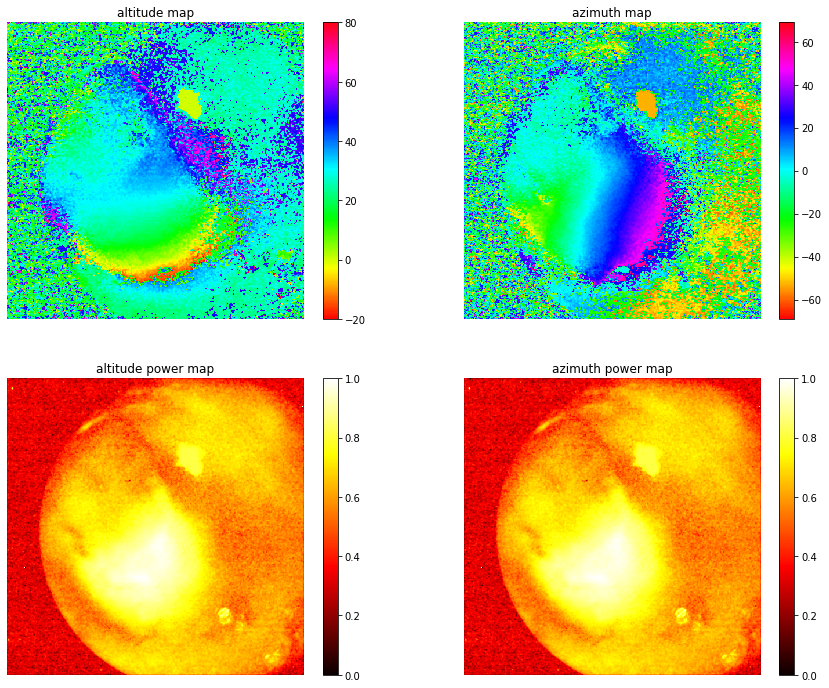

In [98]:
altitude_map = altitude_data['verticalMapScaled']
azimuth_map = azimuth_data['horizontalMapScaled']

f = plt.figure(figsize=(15, 12))
ax1 = f.add_subplot(221)
fig1 = ax1.imshow(altitude_map, vmin=-20, vmax=80,cmap='hsv', interpolation='nearest')
ax1.set_axis_off()
ax1.set_title('altitude map')
_ = f.colorbar(fig1)

ax2 = f.add_subplot(222)
fig2 = ax2.imshow(azimuth_map, cmap='hsv', interpolation='nearest')
ax2.set_axis_off()
ax2.set_title('azimuth map')
_ = f.colorbar(fig2)

ax3 = f.add_subplot(223)
fig3 = ax3.imshow(altitude_power_map, vmin=0, vmax=1, cmap='hot', interpolation='nearest')
ax3.set_axis_off()
ax3.set_title('altitude power map')
_ = f.colorbar(fig3)

ax4 = f.add_subplot(224)
fig4 = ax4.imshow(azimuth_power_map, vmin=0, vmax=1, cmap='hot', interpolation='nearest')
ax4.set_axis_off()
ax4.set_title('azimuth power map')
_ = f.colorbar(fig4)

In [102]:
params = {
          'phaseMapFilterSigma': 2.5,
          'signMapFilterSigma': 8.,
          'signMapThr': 0.2,
          'eccMapFilterSigma': 15.0,
          'splitLocalMinCutStep': 5.,
          'closeIter': 3,
          'openIter': 3,
          'dilationIter': 15,
          'borderWidth': 1,
          'smallPatchThr': 100,
          'visualSpacePixelSize': 0.5,
          'visualSpaceCloseIter': 15,
          'splitOverlapThr': 1.1,
          'mergeOverlapThr': 0.1
          }

In [103]:
trial = rm.RetinotopicMappingTrial(altPosMap=altitude_map,
                                   aziPosMap=azimuth_map,
                                   altPowerMap=altitude_power_map,
                                   aziPowerMap=azimuth_power_map,
                                   vasculatureMap=vasculature_map,
                                   mouseID='test',
                                   dateRecorded='160612',
                                   comments='This is an example.',
                                   params=params)

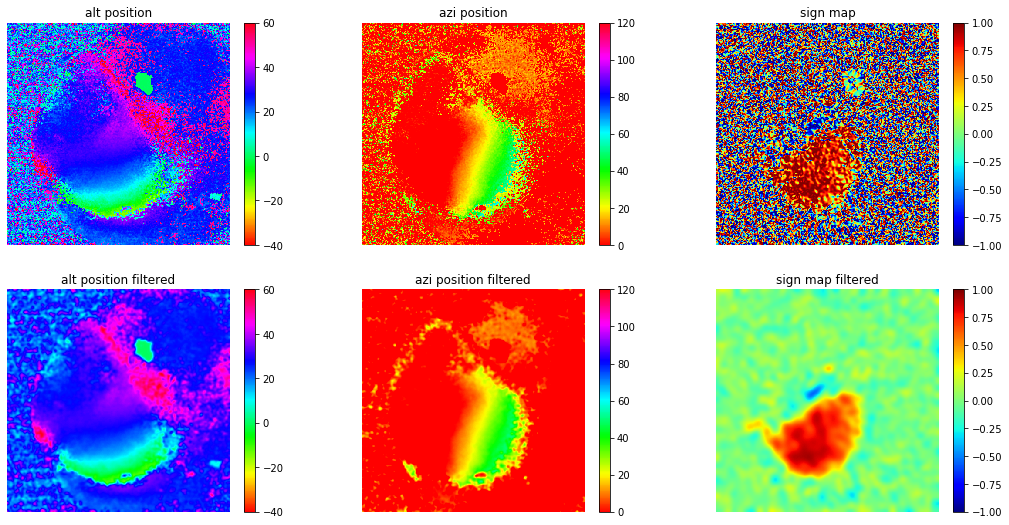

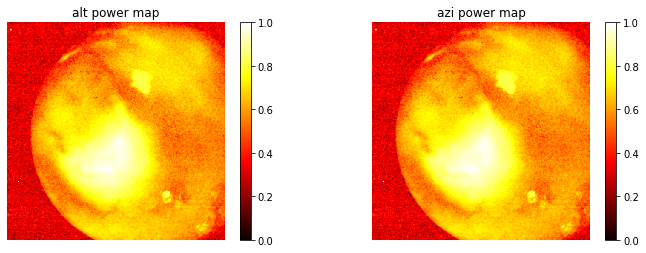

In [104]:
_ = trial._getSignMap(isPlot=True)
plt.show()

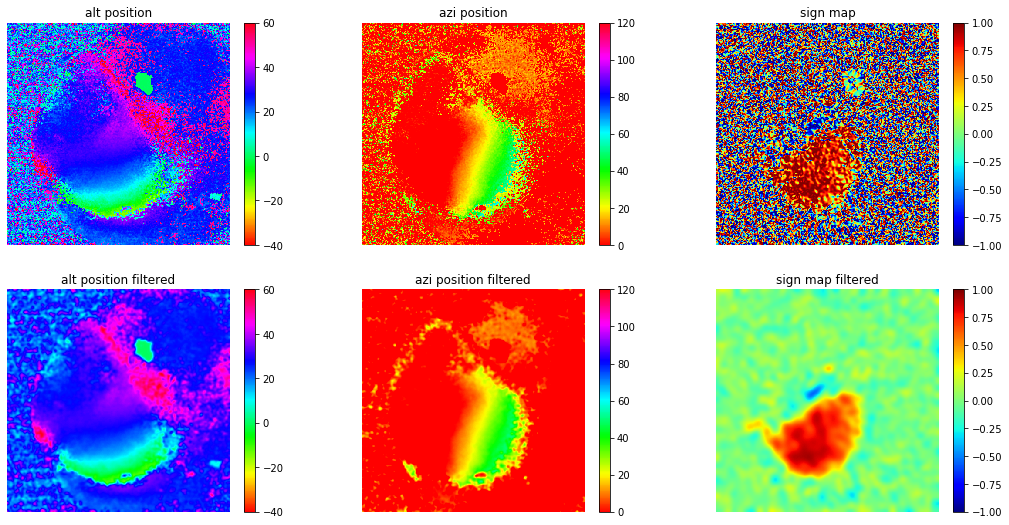

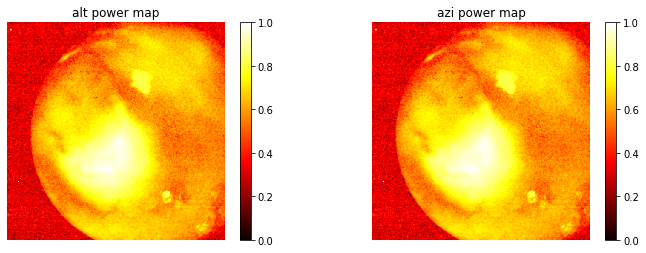

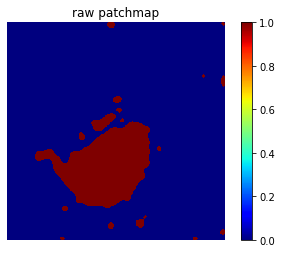

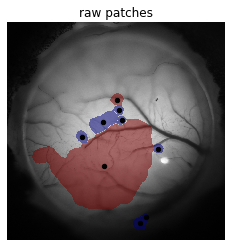

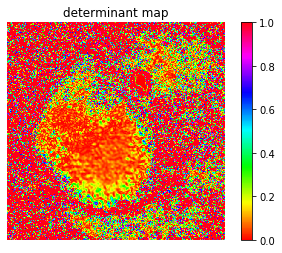

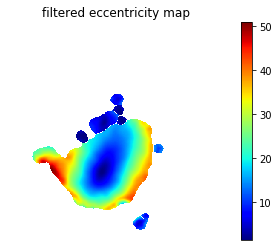

patch01AU=3392.5 AS=9324.353 ratio=2.7485195398857774
4 local minuma were found!!!


C:\code\retinotopic_mapping\retinotopic_mapping\RetinotopicMapping.py:397: RuntimeWarning: invalid value encountered in less_equal
  marker[eccMap2 <= (currThr)] = 1
C:\Users\tonyVR\Anaconda3\envs\retinotopic_mapping\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\tonyVR\Anaconda3\envs\retinotopic_mapping\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


patch02AU=160.0 AS=196.39433 ratio=1.2274645805358886
Only one local minumum was found!!!
patch03AU=16.0 AS=284.68097 ratio=17.792560577392578
Only one local minumum was found!!!
patch04AU=249.0 AS=369.1607 ratio=1.4825731147245231
Only one local minumum was found!!!
patch05AU=20.5 AS=31.342037 ratio=1.5288798634598895
Only one local minumum was found!!!
patch06AU=23.75 AS=25.259922 ratio=1.06357566431949
patch07AU=778.75 AS=1069.15 ratio=1.372905328300562
Only one local minumum was found!!!
patch08AU=23.25 AS=22.337357 ratio=0.9607465190272177
patch09AU=10.75 AS=87.790924 ratio=8.166597588117732
Only one local minumum was found!!!


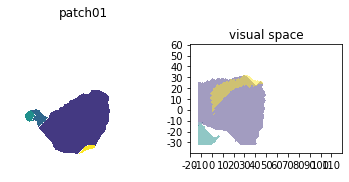

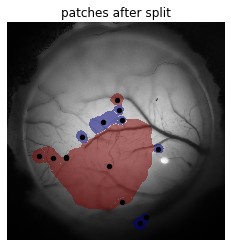

merge iteration: 1


C:\Users\tonyVR\Anaconda3\envs\retinotopic_mapping\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\tonyVR\Anaconda3\envs\retinotopic_mapping\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\code\retinotopic_mapping\retinotopic_mapping\RetinotopicMapping.py:1444: RuntimeWarning: invalid value encountered in double_scalars
  overlapRatio2 = Aoverlap / AU2


merging: patch02 & patch06, overlap ratio: 0.021052631578947368
merge iteration: 2


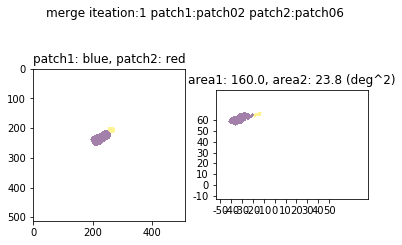

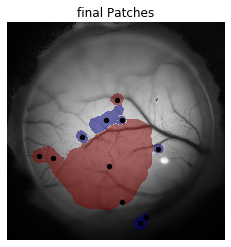

In [105]:
trial.processTrial(isPlot=True)

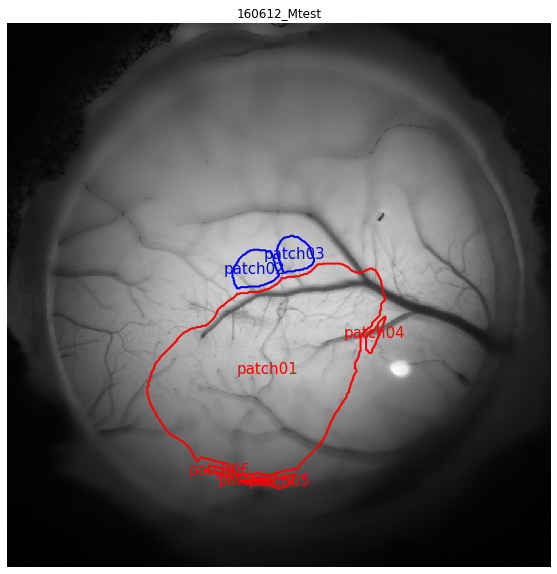

In [93]:
_ = trial.plotFinalPatchBorders2()
plt.show()

In [15]:
names = [
         ['patch01', 'V1'],
         ['patch02', 'PM'],
         ['patch03', 'RL'],
         ['patch04', 'P'],
         ['patch05', 'LM'],
         ['patch06', 'AM'],
         ['patch07', 'LI'],
         ['patch08', 'MMA'],
         ['patch09', 'AL'],
         ['patch10', 'RLL'],
         ['patch11', 'LLA'],
#          ['patch12', 'MMP'],
         ['patch13', 'MMP']
         ]

finalPatchesMarked = dict(trial.finalPatches)

for i, namePair in enumerate(names):
    currPatch = finalPatchesMarked.pop(namePair[0])
    newPatchDict = {namePair[1]:currPatch}
    finalPatchesMarked.update(newPatchDict)
    
trial.finalPatchesMarked = finalPatchesMarked

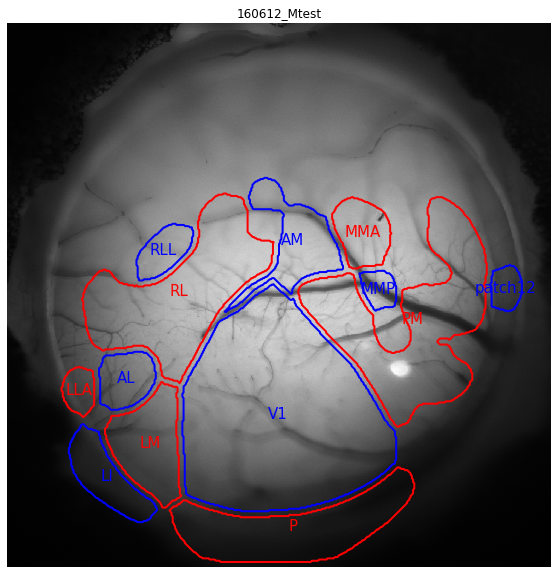

In [16]:
_ = trial.plotFinalPatchBorders2()
plt.show()

merge iteration: 1
merging: patch01.1 & patch13, overlap ratio: 0.0888888888889
merge iteration: 2


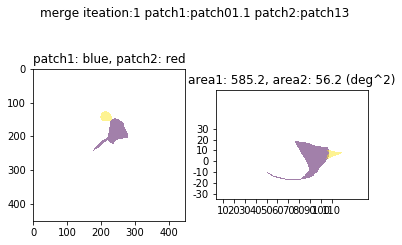

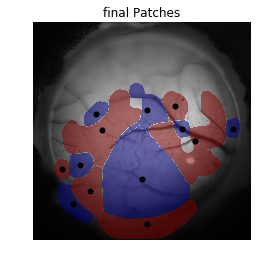

In [14]:
_ = trial._mergePatches(isPlot=True)
plt.show()